# **Soham Ghosh (RA2011003010504) - House Rent Prediction**
****Dataset Pre-processing using Python****

Here, I've demonstrated the pre-processing techniques (Data Cleaning) on a pre defined csv file

# Importing Required Directories

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#Data Analysis Libraries
import pandas as pd
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_squared_error

In [5]:
import warnings
warnings.filterwarnings('ignore')

# About Dataset
**Context** 
Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.

Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.

**Content**
In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

In [7]:
#Accessing the Dataset
final_df=pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')

In [8]:
#Looking at the Dataset
final_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [9]:
final_df.shape

(4746, 12)

**Observation:**
The dataset is being demonstrated here. It is also observed that the dataset has **4746** rows and **12** columns

In [10]:
#Accessing the columns of the Dataset
final_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**Observation:** This dataset doesn't contain any Null values.

In [12]:
#Checking the Mean of the Rent
print('The Mean of the Rent is {}'.format(final_df['Rent'].mean()))
print('The Standard Deviation of Rent is {}'.format(final_df['Rent'].std()))

The Mean of the Rent is 34993.45132743363
The Standard Deviation of Rent is 78106.4129373483


# Exploratory Data Analysis (EDA):
it is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

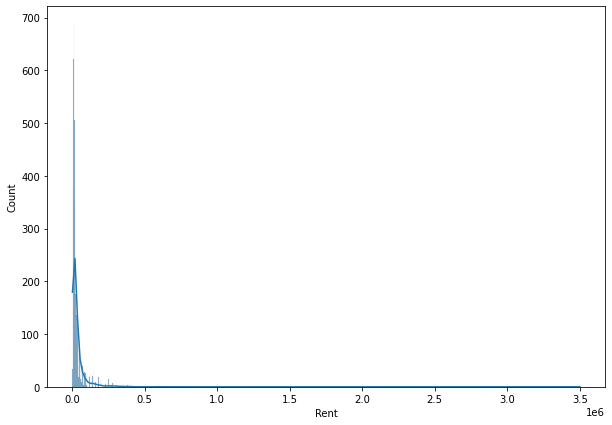

In [13]:
#Analyzing the Rent
plt.figure(figsize=(10,7))
sns.histplot(final_df.Rent,kde=True)
plt.show()

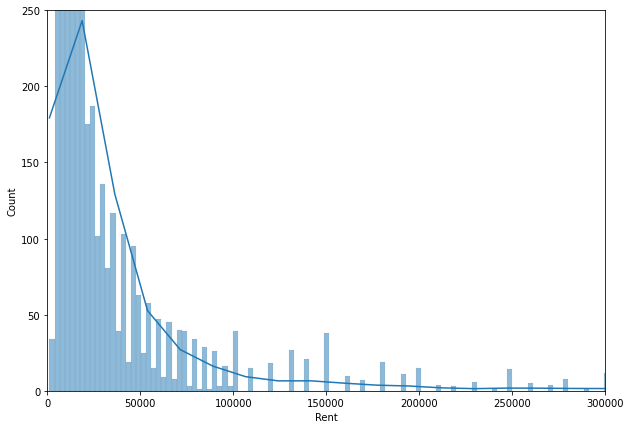

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(final_df.Rent,kde=True)
plt.xlim(0,300000)
plt.ylim(0,250)
plt.show()

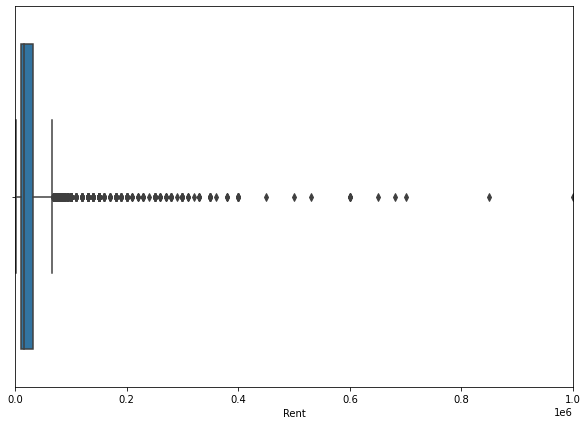

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(final_df.Rent)
plt.xlim(0,1000000)
plt.show()

<AxesSubplot:xlabel='Rent'>

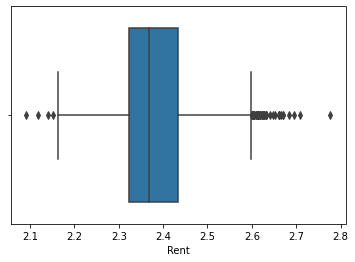

In [17]:
#We will apply Log Transformation in order to convert Rent into Normal Distribution
final_df['Rent']=np.log1p(final_df['Rent'])

sns.boxplot('Rent',data=final_df)

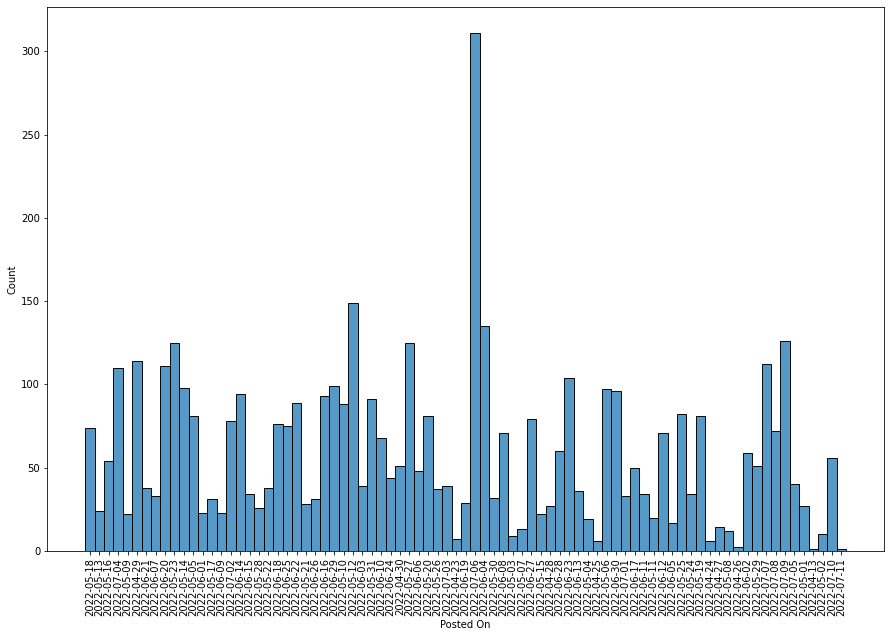

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(final_df['Posted On'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
#Analyzing the BHK column
final_df.BHK.unique()

array([2, 1, 3, 6, 4, 5])

<AxesSubplot:xlabel='BHK', ylabel='count'>

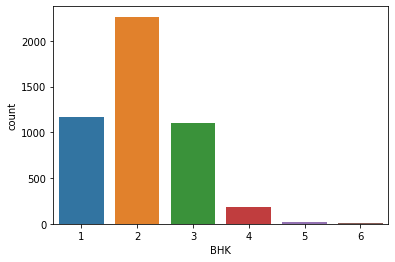

In [20]:
sns.countplot('BHK',data=final_df)

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

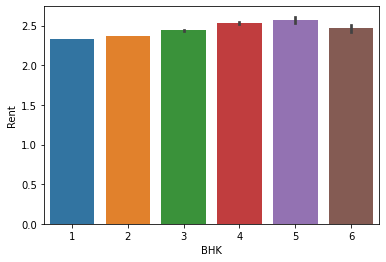

In [21]:
sns.barplot(x='BHK',y='Rent',data=final_df)

**Observation:**
* The Average Rent of the 5BHK is the highest compared to all.

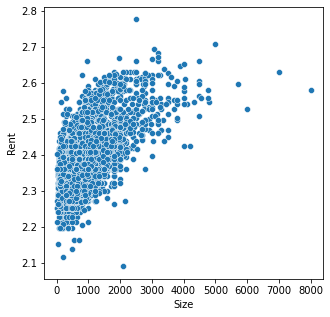

In [22]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=final_df.Size,y=final_df.Rent)
plt.show()

<AxesSubplot:xlabel='Size'>

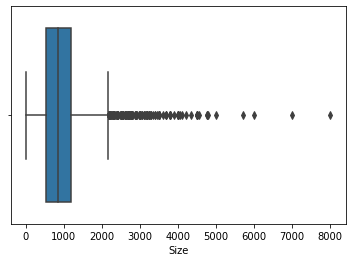

In [23]:
sns.boxplot('Size',data=final_df)

**Observation:**
* More the Size of House,More the Rent is
* Contains a lot of Outliers.

In [24]:
#Analyzing the Area Locality
final_df['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [25]:
#Analyzing the City Column
final_df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

**Observation**
* The Average Rent of Mumbai House is the Highest than all of the Cities.

# Data Cleaning
It is the process of fixing incorrect, incomplete, duplicate or otherwise erroneous data in a data set. It involves identifying data errors and then changing, updating or removing data to correct them. Data cleansing improves data quality and helps provide more accurate, consistent and reliable information for decision-making in an organization. Here in this dataset, since there were all non-null values, hence removal of data is not necessary. Data here is now only checked for incorrectness, incompleteness and duplicacy. 

In [26]:
#Supressing the Outliers
final_df=final_df[(final_df['Rent']<14) & (final_df['Size']<5000)]

In [27]:
final_df.shape

(4741, 12)

Implementing the cleaning procedure, 5 of the dataset values as rows were suppressed as outliers and hence the final dataset rows were reduced to **4741**

In [28]:
#Splitting the Posted on Date into Day,Month and Year
final_df['Day']=final_df['Posted On'].str.split('-',expand=True)[2].astype(int)
final_df['Month']=final_df['Posted On'].str.split('-',expand=True)[1].astype(int)
final_df['Year']=final_df['Posted On'].str.split('-',expand=True)[0].astype(int)

In [29]:
#Removing the Posted On column
final_df.drop('Posted On',axis=1,inplace=True)

In [30]:
#Converting the Categorical Variables into Numeric Form
final_df=pd.get_dummies(data=final_df,columns=['Area Type','City','Furnishing Status','Bathroom','Tenant Preferred','Point of Contact'])

In [31]:
final_df.head()

,BHK,Rent,Size,Floor,Area Locality,Day,Month,Year,Area Type_Built Area,Area Type_Carpet Area,...,Bathroom_4,Bathroom_5,Bathroom_6,Bathroom_7,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,2.323411,1100,Ground out of 2,Bandel,18,5,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,2.389087,800,1 out of 3,"Phool Bagan, Kankurgachi",13,5,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,2.374071,1000,1 out of 3,Salt Lake City Sector 2,16,5,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2,2.323411,800,1 out of 2,Dumdum Park,4,7,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2,2.294834,850,1 out of 2,South Dum Dum,9,5,2022,0,1,...,0,0,0,0,1,0,0,0,0,1


Organization of Data

In [32]:
#Splitting the Floor into valuable Information
final_df['Living Floor']=final_df['Floor'].str.split('out of',expand=True)[0]
final_df['Total Floors']=final_df['Floor'].str.split('out of',expand=True)[1]

In [33]:
final_df['Living Floor'].value_counts()

1                  1159
2                   945
Ground              925
3                   511
4                   271
5                   164
6                    93
7                    74
10                   67
8                    66
9                    64
12                   47
11                   43
15                   41
14                   34
18                   26
Upper Basement       23
17                   22
16                   21
19                   16
13                   15
20                   12
25                   12
Lower Basement       10
23                    9
21                    6
24                    5
30                    5
34                    4
28                    4
27                    3
35                    3
22                    3
32                    3
26                    3
65                    3
60                    3
40                    2
36                    2
48                    2
45                    2
53              

In [34]:
final_df[final_df['Living Floor']=='Ground']=0
final_df[final_df['Living Floor']=='Ground ']=0
final_df[final_df['Living Floor']=='Upper Basement ']=1
final_df[final_df['Living Floor']=='Lower Basement ']=0

In [35]:
final_df[final_df['Living Floor']=='Upper Basement']=1
final_df[final_df['Living Floor']=='Lower Basement']=0

In [36]:
final_df['Living Floor']=final_df['Living Floor'].astype(int)

In [37]:
final_df['Total Floors'].value_counts()

0      936
 4     820
 3     701
 2     511
 5     392
      ... 
 66      1
 85      1
 71      1
 81      1
 39      1
Name: Total Floors, Length: 68, dtype: int64

In [38]:
#Applying HotLabelEncoder on Area Locality
le=LabelEncoder()
final_df['Area Locality']=le.fit_transform(final_df['Area Locality'].astype(str))

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 0 to 4745
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4741 non-null   int64  
 1   Rent                               4741 non-null   float64
 2   Size                               4741 non-null   int64  
 3   Floor                              4741 non-null   object 
 4   Area Locality                      4741 non-null   int64  
 5   Day                                4741 non-null   int64  
 6   Month                              4741 non-null   int64  
 7   Year                               4741 non-null   int64  
 8   Area Type_Built Area               4741 non-null   uint8  
 9   Area Type_Carpet Area              4741 non-null   uint8  
 10  Area Type_Super Area               4741 non-null   uint8  
 11  City_Bangalore                     4741 non-null   uint8

**Observation**
* Final preprocessed tabular representation of the dataset

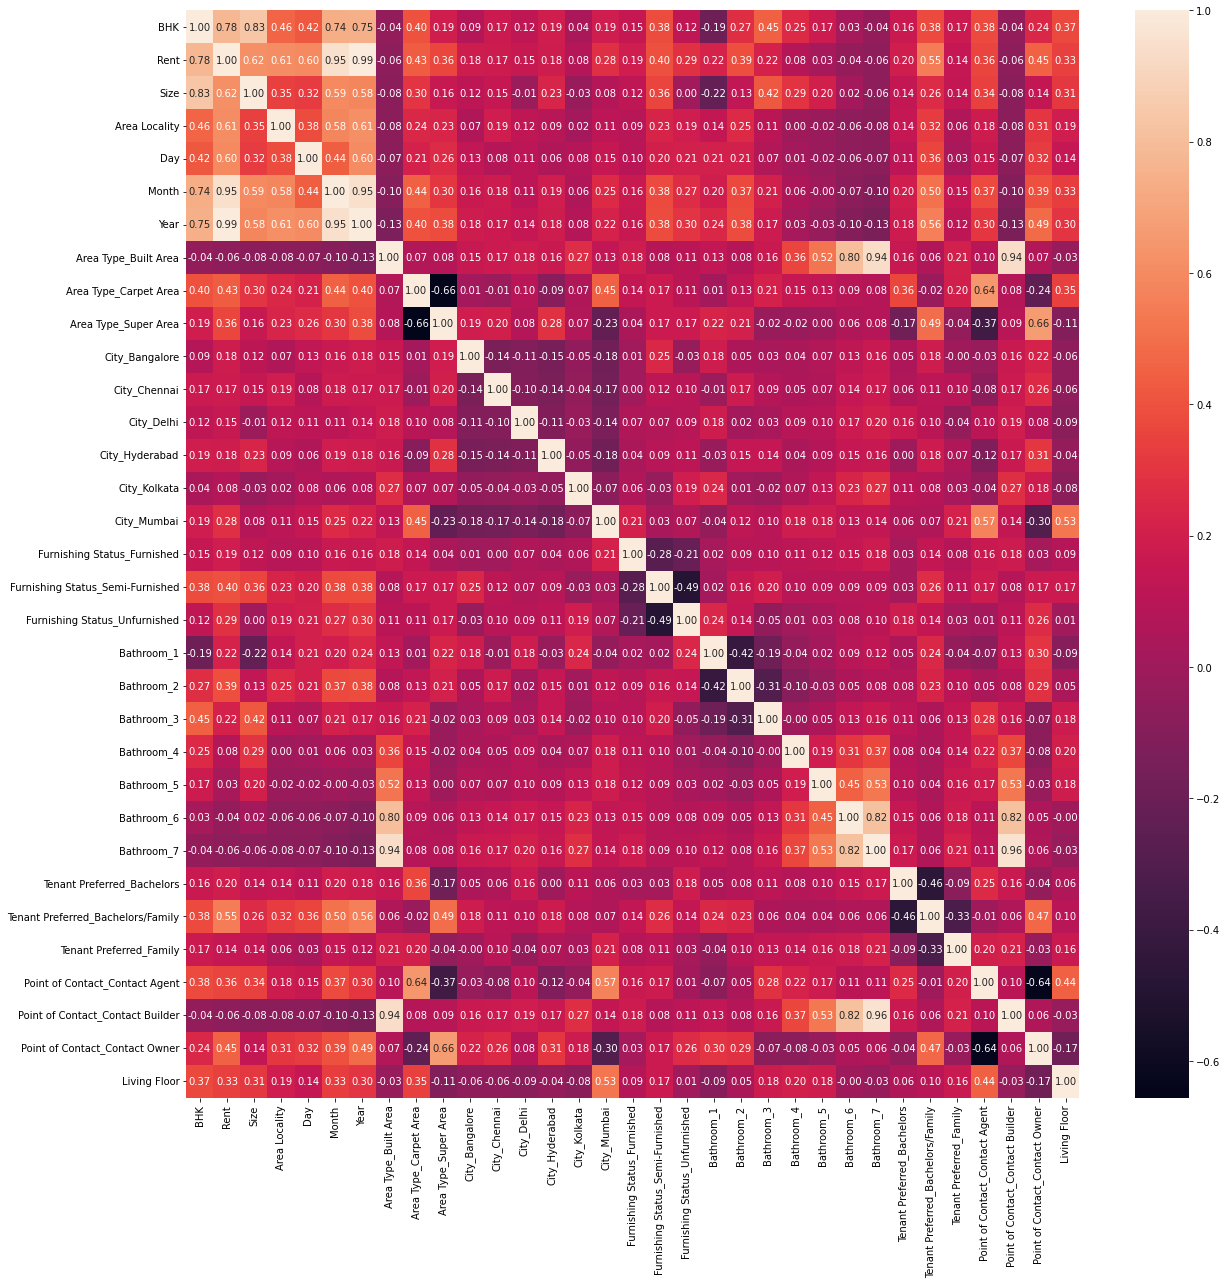

In [40]:
#Correlation between all Features
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f')
plt.show()

**Observation**
* Final representation of the preprocessed dataset and correlation of all the features implemented in the form of a heatmap